1's examples Means = [[52.11607143 62.85714286  2.79910714]]
2's examples Means = [[53.67901235 62.82716049  7.45679012]]
projection


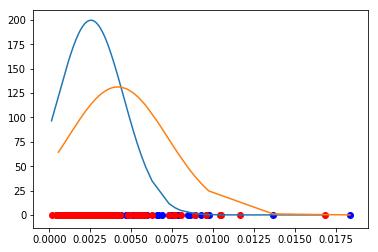

In [2]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

file = "haberman_fld.csv"
data = pd.read_csv (file, header=None)
noOfTrainingExamples = 305

# Separate the features and the classes
x = data.iloc[0:noOfTrainingExamples, 1:4].values 
y = data.iloc[0:noOfTrainingExamples, 4].values

# Here positive means class 1 and negative means class 2
positiveCount = np.count_nonzero(y)
negativeCount = noOfTrainingExamples - positiveCount
positiveSum = np.zeros((1,3))
negativeSum = np.zeros((1,3))

for i in range (noOfTrainingExamples):
    if y[i] == 1:
        positiveSum += x[i]
    else:
        negativeSum += x[i]

# Find the means of each class
positiveExamplesMean = positiveSum/positiveCount
negativeExamplesMean = negativeSum/negativeCount
print ("1's examples Means = " + str(positiveExamplesMean))
print ("2's examples Means = " + str(negativeExamplesMean))

A = np.zeros((positiveCount,3))
B = np.zeros((negativeCount,3))
i = 0
j = 0
for k in range(noOfTrainingExamples):
    if y[k] == 1:
        A[i] = x[k] - positiveExamplesMean
        i = i + 1
    else:
        B[j] = x[k] - negativeExamplesMean
        j = j + 1

# Calculate Sw and the projection matrix w
Sw = np.add(np.dot(A.T, A), np.dot(B.T, B))
w = np.dot(np.linalg.inv(Sw), (negativeExamplesMean - positiveExamplesMean).T) #(2,1)


# The actual projection --> result
projectedX = np.dot(w.T, x.T).T 

# Calculate the PDFs (for the graph)
print ("projection")
positivePoints = []
negativePoints = []
for i in range (noOfTrainingExamples):
	if y[i] == 1:
		positivePoints.append(projectedX[i])
	else:
		negativePoints.append(projectedX[i])
positivePoints.sort()
positivePointsMean = np.mean(positivePoints)
positivePointsStd = np.std(positivePoints)
negativePoints.sort()
negativePointsMean = np.mean (negativePoints)
negativePointsStd = np.std (negativePoints)
pdf1 = stats.norm.pdf (positivePoints, positivePointsMean, positivePointsStd)
pdf2 = stats.norm.pdf (negativePoints, negativePointsMean, negativePointsStd)
plt.plot(positivePoints, pdf1)
plt.plot(negativePoints, pdf2)

# Save our new data with the classes into a csv file (the projected one)
new_data = np.column_stack((projectedX, y))
df = pd.DataFrame(new_data)
df.to_csv('new_haberman.csv', header=None, index= False)

# plot the graph
plotNegativeX = []
plotNegativeY = []
for i in range(negativeCount):
    plotNegativeX.append(0)
    plotNegativeY.append(negativePoints[i])
plt.scatter(plotNegativeY, plotNegativeX, color = 'blue')

plotPositiveX = []
plotPositiveY = []
for i in range(positiveCount):
    plotPositiveX.append(0)
    plotPositiveY.append(positivePoints[i])
plt.scatter(plotPositiveY, plotPositiveX, color = 'red')

plt.show()


[[4.56000e+03 2.16230e+00 2.90230e+00 3.44440e+00 3.99970e+00 5.92130e+00
  9.23510e+00 1.09216e+01 1.12467e+01 1.30161e+01 1.52434e+01 1.67863e+01
  1.84259e+01 2.17224e+01 2.60249e+01 2.97747e+01 3.62070e+01 4.01487e+01
  4.31794e+01 4.47681e+01 4.80425e+01 5.20219e+01 5.47140e+01 5.90242e+01
  6.28598e+01 6.42034e+01 6.65564e+01 6.60001e+01 6.44871e+01 6.06909e+01
  5.58679e+01 5.12562e+01 4.35466e+01 4.22495e+01 4.24763e+01 4.33327e+01
  4.38382e+01 3.98118e+01 3.32305e+01 2.99355e+01 3.05771e+01 2.76355e+01
  2.41934e+01 2.02642e+01 1.65622e+01 1.35402e+01 1.12055e+01 9.05730e+00
  6.60600e+00 3.69130e+00 1.69380e+00 1.17100e+00 1.01120e+00 9.28600e-01
  9.07300e-01 8.23800e-01 7.04000e-01 7.40000e-01 6.39300e-01 6.77600e-01]]
[[1.67610e+04 3.88380e+00 5.05540e+00 5.62990e+00 7.18920e+00 9.62540e+00
  1.24169e+01 1.42478e+01 1.66314e+01 2.36976e+01 2.78634e+01 3.21435e+01
  3.34619e+01 3.49013e+01 3.55968e+01 3.67612e+01 4.22909e+01 4.60658e+01
  5.06029e+01 5.97249e+01 6.85915e+0

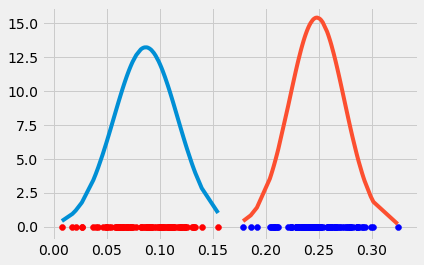

In [225]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as stats

file = "sonar_fld.csv"
data = pd.read_csv (file, header=None)
noOfTrainingExamples = 207
x = data.iloc[0:noOfTrainingExamples, 0:60].values #(1000,2)
y = data.iloc[0:noOfTrainingExamples, 61].values
# print(y)

positiveCount = np.count_nonzero(y)
negativeCount = noOfTrainingExamples - positiveCount
positiveSum = np.zeros((1,60))
negativeSum = np.zeros((1,60))
# print(x.shape)
# print(negativeSum.shape)

for i in range (noOfTrainingExamples):
	if y[i] == 1:
		positiveSum += x[i]
	else:
		negativeSum += x[i]
print (positiveSum)	
print (negativeSum)
positiveExamplesMean = positiveSum/positiveCount
negativeExamplesMean = negativeSum/negativeCount
# print (positiveExamplesMean)
# print (negativeExamplesMean)
# print (positiveSum.shape)
# print (positiveExamplesMean.shape)

A = np.zeros((positiveCount,60))
B = np.zeros((negativeCount,60))
i = 0
j = 0
for k in range(noOfTrainingExamples):
    if y[k] == 1:
        A[i] = x[k] - positiveExamplesMean
        i = i + 1
    else:
        B[j] = x[k] - negativeExamplesMean
        j = j + 1
print (A.size)
#print (A) 
# print ("B")
#print (B)
#Sw = A*A.T + B*B.T
Sw = np.add(np.dot(A.T, A), np.dot(B.T, B))
#print (Sw)
w = np.dot(np.linalg.inv(Sw), (negativeExamplesMean - positiveExamplesMean).T) #(2,1)
#print ("W")
#print (w)


projectedX = np.dot(w.T, x.T).T #(1000,1)
print ("projection")
# print (projectedX)
positivePoints = []
negativePoints = []
for i in range (noOfTrainingExamples):
	if y[i] == 1:
		positivePoints.append(projectedX[i])
	else:
		negativePoints.append(projectedX[i])
positivePoints.sort()
positivePointsMean = np.mean(positivePoints)
positivePointsStd = np.std(positivePoints)
negativePoints.sort()
negativePointsMean = np.mean (negativePoints)
negativePointsStd = np.std (negativePoints)
pdf1 = stats.norm.pdf (positivePoints, positivePointsMean, positivePointsStd)
pdf2 = stats.norm.pdf (negativePoints, negativePointsMean, negativePointsStd)
plt.plot(positivePoints, pdf1)
plt.plot(negativePoints, pdf2)

a = 1/(2*negativePointsStd**2) - 1/(2*positivePointsStd**2)
b = positivePointsMean/(positivePointsStd**2) - negativePointsMean/(negativePointsStd**2)
c = negativePointsMean**2 /(2*negativePointsStd**2) - positivePointsMean**2 / (2*positivePointsStd**2) - np.log(positivePointsStd/negativePointsStd)
result = np.roots([a,b,c])

plotNegativeX = []
plotNegativeY = []
for i in range(negativeCount):
    plotNegativeX.append(0)
    plotNegativeY.append(negativePoints[i])
plt.scatter(plotNegativeY, plotNegativeX, color = 'blue')

plotPositiveX = []
plotPositiveY = []
for i in range(positiveCount):
    plotPositiveX.append(0)
    plotPositiveY.append(positivePoints[i])
plt.scatter(plotPositiveY, plotPositiveX, color = 'red')

plt.show()


new_data = np.column_stack((projectedX, y))
df = pd.DataFrame(new_data)

df.to_csv('new_sonar.csv', header=None, index= False)

(747, 5)
[[ 52076.    969.   1338. 334500.   5726.]]
[[226555.   6140.   2737. 684250.  19819.]]
885
projection


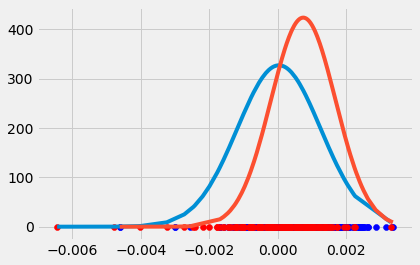

In [226]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import scipy.stats as stats

file = "blood_transfusion.csv"
data = pd.read_csv (file, header=None)
noOfTrainingExamples = data.shape[0]
x = data.iloc[0:noOfTrainingExamples, 0:data.shape[1] - 1].values #(1000,2)
y = data.iloc[0:noOfTrainingExamples, data.shape[1] - 1].values
print(x.shape)
positiveCount = np.count_nonzero(y)
negativeCount = noOfTrainingExamples - positiveCount
positiveSum = np.zeros((1,x.shape[1]))
negativeSum = np.zeros((1,x.shape[1]))
# print(x.shape)
# print(negativeSum.shape)

for i in range (noOfTrainingExamples):
	if y[i] == 1:
		positiveSum += x[i]
	else:
		negativeSum += x[i]
print (positiveSum)	
print (negativeSum)
positiveExamplesMean = positiveSum/positiveCount
negativeExamplesMean = negativeSum/negativeCount
# print (positiveExamplesMean)
# print (negativeExamplesMean)
# print (positiveSum.shape)
# print (positiveExamplesMean.shape)

A = np.zeros((positiveCount,x.shape[1]))
B = np.zeros((negativeCount,x.shape[1]))
i = 0
j = 0
for k in range(noOfTrainingExamples):
    if y[k] == 1:
        A[i] = x[k] - positiveExamplesMean
        i = i + 1
    else:
        B[j] = x[k] - negativeExamplesMean
        j = j + 1
print (A.size)
#print (A) 
# print ("B")
#print (B)
#Sw = A*A.T + B*B.T
Sw = np.add(np.dot(A.T, A), np.dot(B.T, B))
#print (Sw)
w = np.dot(np.linalg.inv(Sw), (negativeExamplesMean - positiveExamplesMean).T) #(2,1)
#print ("W")
#print (w)


projectedX = np.dot(w.T, x.T).T #(1000,1)
print ("projection")
# print (projectedX)
positivePoints = []
negativePoints = []
for i in range (noOfTrainingExamples):
	if y[i] == 1:
		positivePoints.append(projectedX[i])
	else:
		negativePoints.append(projectedX[i])
positivePoints.sort()
positivePointsMean = np.mean(positivePoints)
positivePointsStd = np.std(positivePoints)
negativePoints.sort()
negativePointsMean = np.mean (negativePoints)
negativePointsStd = np.std (negativePoints)
pdf1 = stats.norm.pdf (positivePoints, positivePointsMean, positivePointsStd)
pdf2 = stats.norm.pdf (negativePoints, negativePointsMean, negativePointsStd)
plt.plot(positivePoints, pdf1)
plt.plot(negativePoints, pdf2)

a = 1/(2*negativePointsStd**2) - 1/(2*positivePointsStd**2)
b = positivePointsMean/(positivePointsStd**2) - negativePointsMean/(negativePointsStd**2)
c = negativePointsMean**2 /(2*negativePointsStd**2) - positivePointsMean**2 / (2*positivePointsStd**2) - np.log(positivePointsStd/negativePointsStd)
result = np.roots([a,b,c])

plotNegativeX = []
plotNegativeY = []
for i in range(negativeCount):
    plotNegativeX.append(0)
    plotNegativeY.append(negativePoints[i])
plt.scatter(plotNegativeY, plotNegativeX, color = 'blue')

plotPositiveX = []
plotPositiveY = []
for i in range(positiveCount):
    plotPositiveX.append(0)
    plotPositiveY.append(positivePoints[i])
plt.scatter(plotPositiveY, plotPositiveX, color = 'red')

plt.show()


new_data = np.column_stack((projectedX, y))
df = pd.DataFrame(new_data)

df.to_csv('new_blood_trans.csv', header=None, index= False)
# print(df.head())
